In [2]:
%%bash
../cpp/simplemd.x < in

Starting configuration           : crystal.xyz
Final configuration              : output.xyz
Number of atoms                  : 256
Temperature                      : 0.722000
Time step                        : 0.005000
Friction                         : 0.000000
Cutoff for forces                : 2.500000
Cutoff for neighbour list        : 3.000000
Number of steps                  : 2000
Stride for trajectory            : 10
Trajectory file                  : trajectory.xyz
Stride for statistics            : 10
Statistics file                  : energies.dat
Max average number of neighbours : 1000
Seed                             : 0
Are atoms wrapped on output?     : F
List size: 11008
Neighbour list recomputed at step 18
List size: 11301
Neighbour list recomputed at step 42
List size: 11621
Neighbour list recomputed at step 66
List size: 11719
Neighbour list recomputed at step 90
List size: 11754
Neighbour list recomputed at step 114
List size: 11662
Neighbour list recomputed at ste

In [4]:
%%bash
ls -ltr

total 3808
-rw-r--r--  1 bussi  staff    19542 Nov 15  2016 liquid1.55.xyz
-rw-r--r--  1 bussi  staff    19542 Nov 15  2016 liquid.xyz
-rwxr-xr-x  1 bussi  staff      534 Nov 15  2016 lattice
-rw-r--r--  1 bussi  staff      180 Nov 15  2016 in
-rw-r--r--  1 bussi  staff     4624 Nov 15  2016 crystal1.55.xyz
-rw-r--r--  1 bussi  staff     5593 Nov 15  2016 crystal.xyz
-rw-r--r--  1 bussi  staff       72 Nov 12 11:30 Untitled.ipynb
-rw-r--r--  1 bussi  staff  1849400 Nov 12 11:31 trajectory.xyz
-rw-r--r--  1 bussi  staff     9247 Nov 12 11:31 output.xyz
-rw-r--r--  1 bussi  staff    12293 Nov 12 11:31 energies.dat


In [5]:
%%bash
head energies.dat

10 0.050000 0.665988 -1564.572508 -1308.832970 -1308.832970
20 0.100000 0.332295 -1436.215661 -1308.614399 -1308.614399
30 0.150000 0.368368 -1450.234575 -1308.781269 -1308.781269
40 0.200000 0.381468 -1455.231913 -1308.748066 -1308.748066
50 0.250000 0.388506 -1457.931281 -1308.744817 -1308.744817
60 0.300000 0.410525 -1466.385169 -1308.743679 -1308.743679
70 0.350000 0.414054 -1467.747797 -1308.750951 -1308.750951
80 0.400000 0.391082 -1458.906943 -1308.731268 -1308.731268
90 0.450000 0.395614 -1460.648493 -1308.732591 -1308.732591
100 0.500000 0.425672 -1472.200803 -1308.742586 -1308.742586


In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
ene=np.loadtxt("energies.dat")

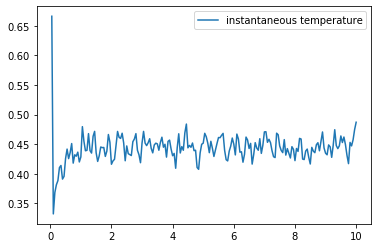

In [13]:
plt.plot(ene[:,1],ene[:,2],label="instantaneous temperature")
plt.legend()
plt.show()

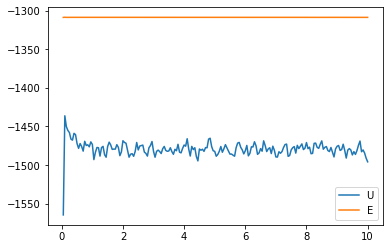

In [15]:
plt.plot(ene[:,1],ene[:,3],label="U")
plt.plot(ene[:,1],ene[:,4],label="E")
plt.legend()
plt.show()

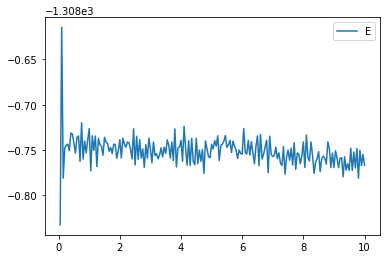

In [22]:
plt.plot(ene[:,1],ene[:,4],label="E")
plt.legend()
plt.show()

In [31]:
%%bash
for dt in 0.0001 0.0002 0.0005 0.001 0.002 0.005 0.01 0.02 0.05 0.1
do
cat > in-$dt << EOF
inputfile crystal.xyz
outputfile output.xyz
temperature 0.722
tstep $dt
friction 0.0
forcecutoff 2.5
listcutoff  3.0
nstep $(awk -v dt=$dt 'BEGIN{print(2000*0.005/dt)}')
nconfig 10 trajectory.xyz
nstat   10 energies-$dt.dat
EOF
../cpp/simplemd.x < in-$dt &
done

Starting configuration           : crystal.xyz
Final configuration              : output.xyz
Number of atoms                  : 256
Temperature                      : 0.722000
Time step                        : 0.100000
Friction                         : 0.000000
Cutoff for forces                : 2.500000
Cutoff for neighbour list        : 3.000000
Number of steps                  : 100
Stride for trajectory            : 10
Trajectory file                  : trajectory.xyz
Stride for statistics            : 10
Statistics file                  : energies-0.1.dat
Max average number of neighbours : 1000
Seed                             : 0
Are atoms wrapped on output?     : F
List size: 11008
Neighbour list recomputed at step 0
List size: 11485
Neighbour list recomputed at step 1
List size: 11871
Neighbour list recomputed at step 2
List size: 12157
Neighbour list recomputed at step 3
List size: 12271
Neighbour list recomputed at step 4
List size: 12279
Neighbour list recomputed at step 5

In [35]:
%%bash
head energies-0.0001.dat

10 0.001000 0.813542 -1621.167750 -1308.767589 -1308.767589
20 0.002000 0.813392 -1621.110000 -1308.767589 -1308.767589
30 0.003000 0.813141 -1621.013755 -1308.767589 -1308.767589
40 0.004000 0.812790 -1620.878966 -1308.767589 -1308.767589
50 0.005000 0.812338 -1620.705536 -1308.767589 -1308.767589
60 0.006000 0.811786 -1620.493324 -1308.767590 -1308.767590
70 0.007000 0.811132 -1620.242141 -1308.767590 -1308.767590
80 0.008000 0.810375 -1619.951755 -1308.767590 -1308.767590
90 0.009000 0.809516 -1619.621888 -1308.767590 -1308.767590
100 0.010000 0.808554 -1619.252221 -1308.767591 -1308.767591


In [40]:
dt=[0.0001,0.0002,0.0005,0.001,0.002,0.005,0.01,0.02,0.05,0.1]
ene=[]
for i in range(len(dt)):
    ene.append(np.loadtxt("energies-" + str(dt[i]) + ".dat"))

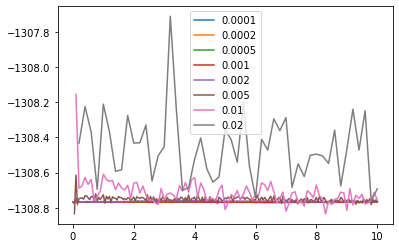

In [47]:
for i in range(len(dt)-2):
    plt.plot(ene[i][:,1],ene[i][:,4],label=str(dt[i]))
plt.legend()
plt.show()

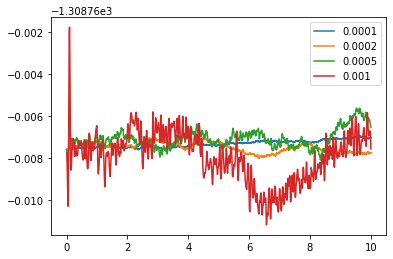

In [48]:
for i in range(len(dt)-6):
    plt.plot(ene[i][:,1],ene[i][:,4],label=str(dt[i]))
plt.legend()
plt.show()

In [53]:
for i in range(len(dt)):
    print(dt[i],np.polyfit(ene[i][:,1],ene[i][:,4],1))

0.0001 [ 5.42706508e-05 -1.30876760e+03]
0.0002 [-4.22103739e-05 -1.30876727e+03]
0.0005 [ 5.12867530e-05 -1.30876732e+03]
0.001 [-1.31983698e-04 -1.30876727e+03]
0.002 [-2.1141637e-06 -1.3087632e+03]
0.005 [-1.76484748e-03 -1.30874290e+03]
0.01 [-1.10433061e-02 -1.30865784e+03]
0.02 [-1.18739472e-02 -1.30840228e+03]
0.05 [nan nan]
0.1 [nan nan]


In [55]:
for i in range(len(dt)):
    print(dt[i],np.std(ene[i][:,4]))

0.0001 0.00016641038804899338
0.0002 0.0002202298652454226
0.0005 0.0004483683234785625
0.001 0.0011860573834923214
0.002 0.002862976739970896
0.005 0.016695156320702752
0.01 0.07300525020991802
0.02 0.18717386234451144
0.05 nan
0.1 nan


In [56]:
for i in range(len(dt)):
    coeff=np.polyfit(ene[i][:,1],ene[i][:,4],1)
    print(dt[i],np.std(ene[i][:,4]-coeff[0]*ene[i][:,1]-coeff[1]))

0.0001 5.610901440648426e-05
0.0002 0.00018344907681105646
0.0005 0.0004232194864686453
0.001 0.0011231954969274202
0.002 0.0028629702349739824
0.005 0.015898841834575496
0.01 0.06567784843686421
0.02 0.1840097901389394
0.05 nan
0.1 nan


In [57]:
%%bash
for T in 0.01 0.02 0.05 0.1 0.2 0.5 1
do
for dt in 0.0005 0.001 0.002 0.005 0.01 0.02 0.05 0.1
do
cat > in-$T-$dt << EOF
inputfile crystal.xyz
outputfile output.xyz
temperature $T
tstep $dt
friction 0.0
forcecutoff 2.5
listcutoff  3.0
nstep $(awk -v dt=$dt 'BEGIN{print(10000*0.005/dt)}')
nconfig 10 trajectory.xyz
nstat   10 energies-$T-$dt.dat
EOF
../cpp/simplemd.x < in-$T-$dt &
done
done

Process is interrupted.


In [60]:
T=[0.01,0.02,0.05,0.1,0.2,0.5,1]
dt=[0.0005,0.001,0.002,0.005,0.01,0.02,0.05,0.1]
ene={}
for j in range(len(T)):
    for i in range(len(dt)):
        ene[i,j]=(np.loadtxt("energies-" + str(T[j])+ "-" + str(dt[i]) + ".dat"))

array([[ 1.00000000e+01,  5.00000000e-03,  2.25020000e-02,
        -1.62117368e+03, -1.61253273e+03, -1.61253273e+03],
       [ 2.00000000e+01,  1.00000000e-02,  2.23990000e-02,
        -1.62113380e+03, -1.61253273e+03, -1.61253273e+03],
       [ 3.00000000e+01,  1.50000000e-02,  2.22260000e-02,
        -1.62106767e+03, -1.61253273e+03, -1.61253273e+03],
       ...,
       [ 7.27900000e+04,  3.63950000e+01,  1.15130000e-02,
        -1.61695355e+03, -1.61253271e+03, -1.61253271e+03],
       [ 7.28000000e+04,  3.64000000e+01,  1.14520000e-02,
        -1.61693030e+03, -1.61253271e+03, -1.61253271e+03],
       [ 7.28100000e+04,  3.64050000e+01,  1.13900000e-02,
        -1.61690666e+03, -1.61253271e+03, -1.61253271e+03]])

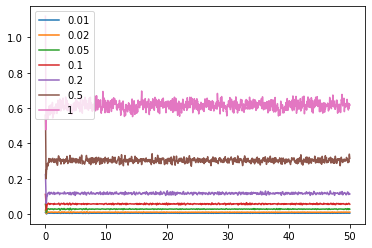

In [65]:
for j in range(len(T)):
    plt.plot(ene[1,j][:,1],ene[1,j][:,2],label=str(T[j]))
plt.legend()
plt.show()

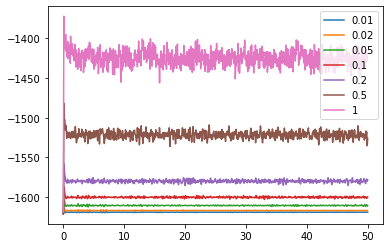

In [66]:
for j in range(len(T)):
    plt.plot(ene[1,j][:,1],ene[1,j][:,3],label=str(T[j]))
plt.legend()
plt.show()

In [69]:
for j in range(len(T)):
    print("T=",T[j])
    for i in range(len(dt)):
        print(dt[i],np.polyfit(ene[i,j][:,1],ene[i,j][:,4],1))

T= 0.01
0.0005 [-1.68151320e-09 -1.61685986e+03]
0.001 [-3.84941032e-09 -1.61685984e+03]
0.002 [-1.52484166e-08 -1.61685974e+03]
0.005 [-1.25108743e-07 -1.61685904e+03]
0.01 [-6.88582414e-07 -1.61685655e+03]
0.02 [-4.67279795e-06 -1.61684645e+03]
0.05 [-3.28909571e-05 -1.61677196e+03]
0.1 [-2.64414550e-04 -1.61644974e+03]
T= 0.02
0.0005 [-3.20707864e-09 -1.61253271e+03]
0.001 [-1.49101760e-08 -1.61253266e+03]
0.002 [-6.35153417e-08 -1.61253247e+03]
0.005 [-4.62002974e-07 -1.61253109e+03]
0.01 [-2.28921556e-06 -1.61252614e+03]
0.02 [-8.25603226e-06 -1.61250623e+03]
0.05 [-8.30704350e-05 -1.61235967e+03]
0.1 [ 9.94232893e-05 -1.61173437e+03]
T= 0.05
0.0005 [ 1.95216330e-06 -1.59955127e+03]
0.001 [ 1.00600079e-06 -1.59955118e+03]
0.002 [ 2.09240687e-06 -1.59955066e+03]
0.005 [ 7.34598168e-06 -1.59954728e+03]
0.01 [ 5.20618773e-06 -1.59953507e+03]
0.02 [-4.14064705e-05 -1.59948516e+03]
0.05 [-1.41587819e-04 -1.59913628e+03]
0.1 [ 5.26054034e+09 -8.94291873e+10]
T= 0.1
0.0005 [-1.25929869e-

In [75]:
%%bash
for n in 1 2 3 4 5 ; do
echo n=$n
./lattice $n > crystal-$n.xyz
done

for n in 1 2 3 4 5
do
for dt in 0.001 0.002 0.005 0.01 0.02 0.05 0.1
do
cat > in-$n-$dt << EOF
inputfile crystal-$n.xyz
outputfile output.xyz
temperature 0.7
tstep $dt
friction 0.0
forcecutoff 2.5
listcutoff  3.0
nstep $(awk -v dt=$dt 'BEGIN{print(10000*0.005/dt)}')
nconfig 1000 trajectory.xyz
nstat   10 energies-$n-$dt.dat
EOF
../cpp/simplemd.x < in-$n-$dt &
done
done

n=1
n=2
n=3
n=4
n=5
Starting configuration           : crystal-1.xyz
Final configuration              : output.xyz
Number of atoms                  : 4
Temperature                      : 0.700000
Time step                        : 0.010000
Friction                         : 0.000000
Cutoff for forces                : 2.500000
Cutoff for neighbour list        : 3.000000
Number of steps                  : 5000
Stride for trajectory            : 1000
Trajectory file                  : trajectory.xyz
Stride for statistics            : 10
Statistics file                  : energies-1-0.01.dat
Max average number of neighbours : 1000
Seed                             : 0
Are atoms wrapped on output?     : F
List size: 6
Neighbour list recomputed at step 32
List size: 6
Neighbour list recomputed at step 61
List size: 6
Neighbour list recomputed at step 85
List size: 6
Neighbour list recomputed at step 105
List size: 6
Neighbour list recomputed at step 118
List size: 6
Neighbour list recomputed 

In [76]:
N=[1,2,3,4,5]
dt=[0.001,0.002,0.005,0.01,0.02,0.05,0.1]
ene={}
for j in range(len(N)):
    for i in range(len(dt)):
        ene[i,j]=(np.loadtxt("energies-" + str(N[j])+ "-" + str(dt[i]) + ".dat"))

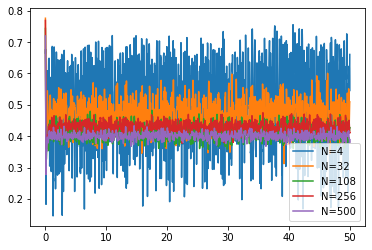

In [79]:
for j in range(len(N)):
    plt.plot(ene[1,j][:,1],ene[1,j][:,2],label="N="+str(4*N[j]**3))
plt.legend()
plt.show()

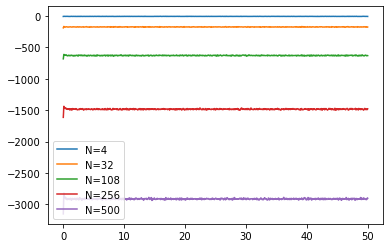

In [82]:
for j in range(len(N)):
    plt.plot(ene[1,j][:,1],ene[1,j][:,3],label="N="+str(4*N[j]**3))
plt.legend()
plt.show()

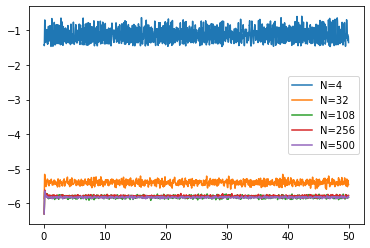

In [83]:
for j in range(len(N)):
    plt.plot(ene[1,j][:,1],ene[1,j][:,3]/(4*N[j]**3),label="N="+str(4*N[j]**3))
plt.legend()
plt.show()

In [89]:
for j in range(len(N)):
    print("N=",4*N[j]**3)
    for i in range(len(dt)):
        print(dt[i],np.std(ene[i,j][:,4]))

N= 4
0.001 0.036146706104805665
0.002 0.1139386842632748
0.005 0.2078014110734544
0.01 nan
0.02 nan
0.05 nan
0.1 nan
N= 32
0.001 0.006907026044771897
0.002 0.02700369504482691
0.005 0.036833327741751375
0.01 0.1624128243373607
0.02 0.24766427799768786
0.05 nan
0.1 nan
N= 108
0.001 0.0021691512513446402
0.002 0.003589300926746272
0.005 0.010515985183373789
0.01 0.02686362931330057
0.02 0.11106431314991105
0.05 nan
0.1 nan
N= 256
0.001 0.0033381171923917243
0.002 0.008705150460692116
0.005 0.013043622713744013
0.01 0.050787946750786676
0.02 0.15772203621152384
0.05 nan
0.1 nan
N= 500
0.001 0.003256143923074193
0.002 0.011945939555829631
0.005 0.0292551550385443
0.01 0.06980241152523237
0.02 0.19228174397447167
0.05 nan
0.1 nan


In [92]:
for j in range(1,len(N)):
    print("N=",4*N[j]**3,dt[3],np.std(ene[3,j][:,4]))
#    print(dt[3],np.std(ene[3,j][:,4]))

N= 32 0.01 0.1624128243373607
N= 108 0.01 0.02686362931330057
N= 256 0.01 0.050787946750786676
N= 500 0.01 0.06980241152523237


In [98]:
pippo=[]
for j in range(1,len(N)):
    pippo.append((4*N[j]**3,np.std(ene[3,j][:,4])))
pippo=np.array(pippo)

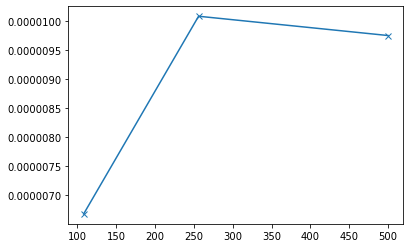

In [106]:
plt.plot(pippo[1:,0],pippo[1:,1]**2/pippo[1:,0],"x-")